In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set o f random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

642

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 37.42,
  'feels_like': 32.68,
  'temp_min': 32.56,
  'temp_max': 41,
  'pressure': 1020,
  'humidity': 53},
 'visibility': 10000,
 'wind': {'speed': 5.99, 'deg': 307, 'gust': 11.01},
 'clouds': {'all': 1},
 'dt': 1639355059,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1639310669,
  'sunset': 1639343514},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | mount isa
Processing Record 3 of Set 1 | pisco
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | daloa
Processing Record 8 of Set 1 | manakara
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | chongwe
Processing Record 12 of Set 1 | mitu
Processing Record 13 of Set 1 | cherskiy
Processing Record 14 of Set 1 | juba
Processing Record 15 of Set 1 | bukavu
Processing Record 16 of Set 1 | mazatlan
Processing Record 17 of Set 1 | lasa
Processing Record 18 of Set 1 | rong kwang
Processing Record 19 of Set 1 | lumsden
Processing Record 20 of Set 1 | christchurch
Processing Record 21 of Set 1 | upernavik
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Set

Processing Record 40 of Set 4 | camopi
Processing Record 41 of Set 4 | bengkulu
Processing Record 42 of Set 4 | krabi
Processing Record 43 of Set 4 | palu
Processing Record 44 of Set 4 | ahipara
Processing Record 45 of Set 4 | san quintin
Processing Record 46 of Set 4 | bonga
Processing Record 47 of Set 4 | west plains
Processing Record 48 of Set 4 | puerto del rosario
Processing Record 49 of Set 4 | salinopolis
Processing Record 50 of Set 4 | hay river
Processing Record 1 of Set 5 | grand gaube
Processing Record 2 of Set 5 | constitucion
Processing Record 3 of Set 5 | asmara
Processing Record 4 of Set 5 | pontes e lacerda
Processing Record 5 of Set 5 | miass
Processing Record 6 of Set 5 | tocopilla
Processing Record 7 of Set 5 | yar-sale
Processing Record 8 of Set 5 | saleaula
City not found. Skipping...
Processing Record 9 of Set 5 | necochea
Processing Record 10 of Set 5 | codrington
Processing Record 11 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 

Processing Record 26 of Set 8 | itarema
Processing Record 27 of Set 8 | iguaba grande
Processing Record 28 of Set 8 | pacific grove
Processing Record 29 of Set 8 | tutoia
Processing Record 30 of Set 8 | pleshanovo
Processing Record 31 of Set 8 | peace river
Processing Record 32 of Set 8 | hobe sound
Processing Record 33 of Set 8 | inzer
Processing Record 34 of Set 8 | rafaela
Processing Record 35 of Set 8 | roald
Processing Record 36 of Set 8 | dubbo
Processing Record 37 of Set 8 | dhankuta
Processing Record 38 of Set 8 | karratha
Processing Record 39 of Set 8 | sinnamary
Processing Record 40 of Set 8 | matay
Processing Record 41 of Set 8 | gao
Processing Record 42 of Set 8 | noumea
Processing Record 43 of Set 8 | moose factory
Processing Record 44 of Set 8 | cortes
Processing Record 45 of Set 8 | port-gentil
Processing Record 46 of Set 8 | norman wells
Processing Record 47 of Set 8 | butaritari
Processing Record 48 of Set 8 | chiredzi
Processing Record 49 of Set 8 | sao filipe
Process

Processing Record 14 of Set 12 | caravelas
Processing Record 15 of Set 12 | lubsko
Processing Record 16 of Set 12 | vestmannaeyjar
Processing Record 17 of Set 12 | ismailia
Processing Record 18 of Set 12 | deep river
Processing Record 19 of Set 12 | kwinana
Processing Record 20 of Set 12 | porbandar
Processing Record 21 of Set 12 | akyab
Processing Record 22 of Set 12 | skjervoy
Processing Record 23 of Set 12 | jarjis
City not found. Skipping...
Processing Record 24 of Set 12 | port lincoln
Processing Record 25 of Set 12 | labutta
City not found. Skipping...
Processing Record 26 of Set 12 | kautokeino
Processing Record 27 of Set 12 | trujillo
Processing Record 28 of Set 12 | gavle
Processing Record 29 of Set 12 | moron
Processing Record 30 of Set 12 | ust-karsk
Processing Record 31 of Set 12 | tessalit
Processing Record 32 of Set 12 | kholm
Processing Record 33 of Set 12 | osoyoos
Processing Record 34 of Set 12 | nador
Processing Record 35 of Set 12 | sapa
Processing Record 36 of Set 1

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,40.80,49,0,9.04,US,2021-12-13 00:22:36
1,Mount Isa,-20.7333,139.5000,98.37,9,7,6.91,AU,2021-12-13 00:25:42
2,Pisco,-13.7000,-76.2167,66.25,88,20,14.97,PE,2021-12-13 00:27:17
3,Bluff,-46.6000,168.3333,65.80,71,20,9.26,NZ,2021-12-13 00:27:17
4,Rikitea,-23.1203,-134.9692,77.81,75,88,7.85,PF,2021-12-13 00:27:18
5,Mataura,-46.1927,168.8643,65.48,36,54,3.74,NZ,2021-12-13 00:27:18
6,Daloa,6.8774,-6.4502,73.98,78,7,3.09,CI,2021-12-13 00:27:18
7,Manakara,-22.1333,48.0167,73.42,84,37,2.28,MG,2021-12-13 00:27:18
8,Saskylakh,71.9167,114.0833,-44.70,100,71,3.49,RU,2021-12-13 00:27:19
9,Chongwe,-15.3292,28.6820,71.11,40,70,3.62,ZM,2021-12-13 00:27:19


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

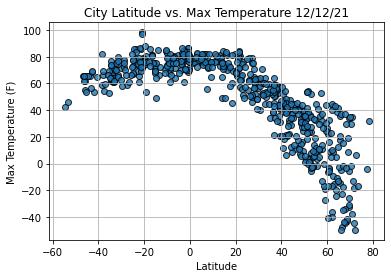

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

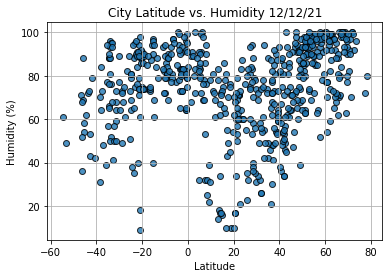

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

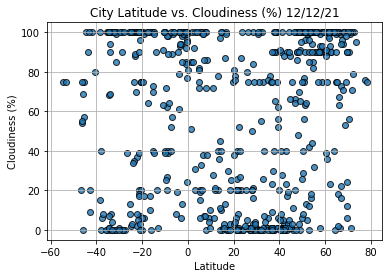

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

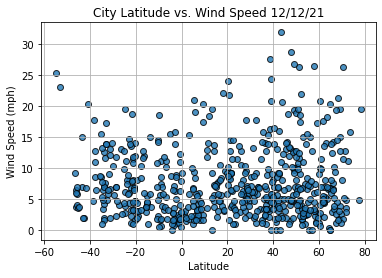

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [19]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [20]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [21]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

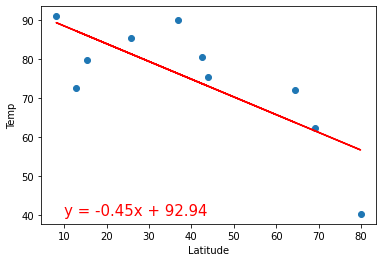

In [22]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,40.80,49,0,9.04,US,2021-12-13 00:22:36
6,Daloa,6.8774,-6.4502,73.98,78,7,3.09,CI,2021-12-13 00:27:18
8,Saskylakh,71.9167,114.0833,-44.70,100,71,3.49,RU,2021-12-13 00:27:19
10,Mitu,1.1983,-70.1733,75.43,89,85,2.53,CO,2021-12-13 00:27:19
11,Cherskiy,68.7500,161.3000,-42.83,100,53,1.72,RU,2021-12-13 00:27:20


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

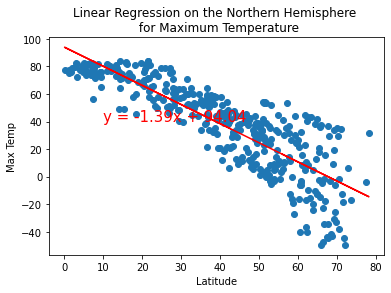

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

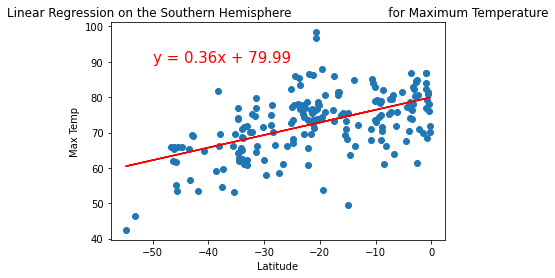

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

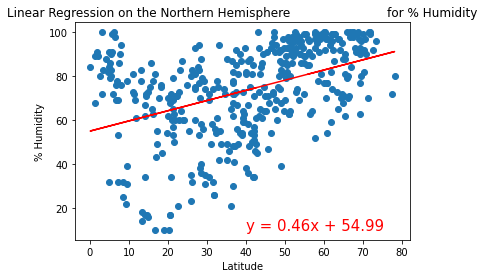

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

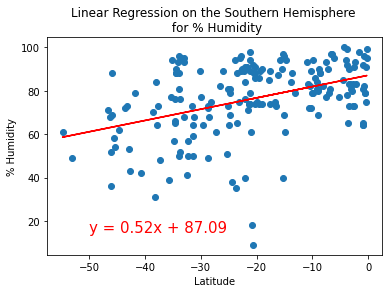

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

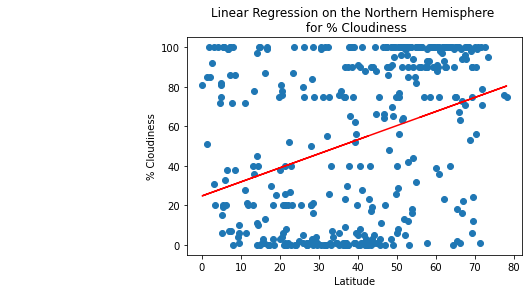

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

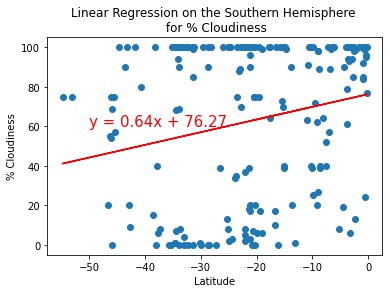

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

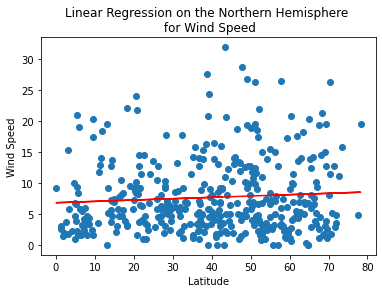

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

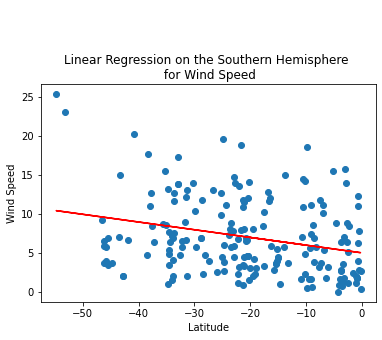

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))